# Eviction Dataset 

By: COOP Cohort 243 Pod Raquel, Elizabeth, Andre, Alex

### Part I: Read csv file

In [43]:
import pandas as pd
import numpy as np

In [44]:
#Large original data set
evictions = pd.read_csv("Evictions_og.csv")

In [45]:
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50365/19,352435,319 WEST 94TH STREET,C103,03/25/2019,Thomas,Bia,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side
1,B068159/16,379048,2332 CRESTON AVE,41,04/25/2017,Richard,McCoy,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,02/21/2017,John,Villanueva,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North
3,75708/18,115775,18-24 25TH ROAD,1,04/23/2019,Maxine,Chevlowe,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,11/08/2018,Justin,Grossman,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester


In [46]:
#Get the size of the dataframe
evictions.shape

(67728, 20)

In [47]:
#get the types of columns in the dataframe
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

###### Changing data types 

In [48]:
#Executed Date column
evictions['Executed Date']= pd.to_datetime(evictions['Executed Date']) #object -> Date
#Borough column
evictions = evictions.rename(columns={'BOROUGH': 'Borough'}) #BOROUGH -> Borough
evictions['Borough'] = evictions['Borough'].str.capitalize() #capitalize first letter only
#NTA column
evictions['NTA'] = evictions['NTA'].astype(str) #change from obj -> String

evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Borough,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50365/19,352435,319 WEST 94TH STREET,C103,2019-03-25,Thomas,Bia,Residential,Manhattan,10025,Not an Ejectment,Possession,40.794205,-73.974734,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side
1,B068159/16,379048,2332 CRESTON AVE,41,2017-04-25,Richard,McCoy,Residential,Bronx,10468,Not an Ejectment,Possession,40.858643,-73.900402,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,2017-02-21,John,Villanueva,Residential,Bronx,10458,Not an Ejectment,Possession,40.865470,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North
3,75708/18,115775,18-24 25TH ROAD,1,2019-04-23,Maxine,Chevlowe,Residential,Queens,11102,Not an Ejectment,Possession,40.774861,-73.926140,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,2018-11-08,Justin,Grossman,Commercial,Bronx,10469,Not an Ejectment,Possession,40.869607,-73.842766,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester


###### Adding Year and Month

In [49]:
#Create a year column
evictions['Year'] = evictions['Executed Date'].dt.year
#Creating a month column
evictions['Month'] = evictions['Executed Date'].dt.month

### Part II: Cleaning

In [50]:
#first get the number of NaN values of each column
evictions.isna().sum()

#this is the NaN values before any cleaning process
#there are a total of 67728 rows in this data

Court Index Number               0
Docket Number                    0
Eviction Address                 0
Eviction Apartment Number    11209
Executed Date                    0
Marshal First Name               0
Marshal Last Name                0
Residential/Commercial           0
Borough                          0
Eviction Postcode                0
Ejectment                        0
Eviction/Legal Possession        0
Latitude                      6444
Longitude                     6444
Community Board               6444
Council District              6444
Census Tract                  6444
BIN                           6562
BBL                           6562
NTA                              0
Year                             0
Month                            0
dtype: int64

In [51]:
#We will drop duplicated rows and name them in a new dataframe called evictions_drop
#more info on df.drop_duplicates => https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
evictions_drop = evictions.drop_duplicates()
evictions_drop.shape

(67184, 22)

In [52]:
#number of NaN values in each row
evictions_drop.isna().sum()

Court Index Number               0
Docket Number                    0
Eviction Address                 0
Eviction Apartment Number    11166
Executed Date                    0
Marshal First Name               0
Marshal Last Name                0
Residential/Commercial           0
Borough                          0
Eviction Postcode                0
Ejectment                        0
Eviction/Legal Possession        0
Latitude                      6421
Longitude                     6421
Community Board               6421
Council District              6421
Census Tract                  6421
BIN                           6539
BBL                           6539
NTA                              0
Year                             0
Month                            0
dtype: int64

In [53]:
#read csv file of racial data
evictions_race =  pd.read_csv("evictions_with_race.csv")

C:\Users\raquel\AppData\Local\Temp\ipykernel_11132\2070389267.py:2: DtypeWarning: Columns (1,9,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  evictions_race =  pd.read_csv("evictions_with_race.csv")


In [54]:
#combine the racial composition column to our working dataframe
racial_majority = evictions_race["Racial Majority"][0:67184]
evictions_drop = evictions_drop.join(racial_majority)

In [55]:
evictions_drop['Racial Majority'].replace(np.nan, 'Unknown', inplace=True)

###### Data Confirmation
In this section we would like to see that some columns have the expected responses and to check if there are any outlying data

In [56]:
evictions_drop['Borough'].unique() #'Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten island'
evictions_drop['Residential/Commercial'].unique() #'Residential', 'Commercial'
evictions_drop['Ejectment'].unique() #'Not an Ejectment', 'Ejectment'
evictions_drop['Eviction/Legal Possession'].unique() #'Possession', 'Eviction', 'Unspecified'

#NTA column
sorted(evictions_drop['NTA'].unique()) #alphabetically order all unique values in NTA column

['Allerton-Pelham Gardens',
 "Annadale-Huguenot-Prince's Bay-Eltingville",
 'Arden Heights',
 'Astoria',
 'Auburndale',
 'Baisley Park',
 'Bath Beach',
 'Battery Park City-Lower Manhattan',
 'Bay Ridge',
 'Bayside-Bayside Hills',
 'Bedford',
 'Bedford Park-Fordham North',
 'Bellerose',
 'Belmont',
 'Bensonhurst East',
 'Bensonhurst West',
 'Borough Park',
 'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel',
 'Briarwood-Jamaica Hills',
 'Brighton Beach',
 'Bronxdale',
 'Brooklyn Heights-Cobble Hill',
 'Brownsville',
 'Bushwick North',
 'Bushwick South',
 'Cambria Heights',
 'Canarsie',
 'Carroll Gardens-Columbia Street-Red Hook',
 'Central Harlem North-Polo Grounds',
 'Central Harlem South',
 'Charleston-Richmond Valley-Tottenville',
 'Chinatown',
 'Claremont-Bathgate',
 'Clinton',
 'Clinton Hill',
 'Co-op City',
 'College Point',
 'Corona',
 'Crotona Park East',
 'Crown Heights North',
 'Crown Heights South',
 'Cypress Hills-City Line',
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boeru

In [57]:
evictions_drop['Year'].unique() 

array([2019, 2017, 2018, 2022, 2020, 2021], dtype=int64)

##### Exploratory Question: Is every Court Index Number a unique eviction?

In [58]:
#We assuned the first column (Court Index Number) is unique at each row but we need to support or deny it
len(evictions["Court Index Number"].unique())
#We see that the length is not the same as the number of rows when we did drop_duplicates (62591 =/ 67184)

62591

In [59]:
#Shows the rows of which Court Index Numbers are duplicated (non-unique values)
evictions[evictions.duplicated(['Court Index Number'], keep=False)].head()

evictions[evictions.duplicated(['Court Index Number'], keep=False)].shape #total rows with duplicated CIN; non-unique values

(9757, 22)

In [60]:
#Shows the list of which Court Index Numbers are duplicated (unique values)
evictions[evictions.duplicated(['Court Index Number'], keep=False)]["Court Index Number"].unique() 

array(['59891/16', '52272/18', '71776/17', ..., '901449/19', '69561/19',
       '300495/21'], dtype=object)

In [61]:
#Let's check on the rows in which the CIN is "59891/16"
evictions[evictions["Court Index Number"] == "59891/16"]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Borough,Eviction Postcode,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Year,Month
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,2017-02-21,John,Villanueva,Residential,Bronx,10458,...,40.865470,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North,2017,2
13252,59891/16,5657,169-05 140TH AVENUE,NaN,2017-01-17,Edward,Guida,Residential,Queens,11434,...,40.670929,-73.770838,12.0,31.0,33402.0,4270722.0,4.125750e+09,Springfield Gardens North,2017,1


In [62]:
#Let's check on another example in which the CIN is "300495/21"
evictions[evictions["Court Index Number"] == "300495/21"]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Borough,Eviction Postcode,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Year,Month
67428,300495/21,13711,7 NAVY PIER COURT APT #2014,2014,2021-09-02,Robert,Renzulli,Residential,Staten island,10304,...,40.628828,-74.074387,1.0,49.0,21.0,5158986.0,5.004878e+09,Stapleton-Rosebank,2021,9
67429,300495/21,13711,7 NAVY PIER COURT APT #2014,2014,2021-09-02,Robert,Renzulli,Residential,Staten island,10304,...,40.628828,-74.074387,1.0,49.0,21.0,5158986.0,5.004878e+09,Stapleton-Rosebank,2021,9


The first example showed rows with the same CIN but were not duplicate rows; the second example showed duplicate rows
Therefore, df.drop_duplicates is the better function.

In [63]:
evictions['Council District'].unique()

array([ 6., 14., 15., 22., 12., 28., 32., 44., 16., 11., 45., 46.,  3.,
        5., 21., 27., 38., 40., nan,  9., 34., 35.,  7., 42., 17.,  1.,
        8., 47., 24., 36., 18., 26., 41., 48., 31., 49., 13., 43., 37.,
       29., 10., 20., 50.,  4.,  2., 33., 39., 30., 25., 19., 23., 51.])

### Part III: GeoData

In [64]:
import geopandas as gpd
import shapely
import matplotlib as plt
import geoplot

##### Visualizing evictions across all boroughs

In [65]:
#get the geo polygon/shape of each borough
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [66]:
#convert each lat and long to a geoDataframe
crs={'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(evictions_drop, crs=crs, 
                          geometry = gpd.points_from_xy(evictions_drop["Longitude"], evictions_drop["Latitude"]))
geo_df.head()

C:\Users\raquel\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Borough,Eviction Postcode,...,Community Board,Council District,Census Tract,BIN,BBL,NTA,Year,Month,Racial Majority,geometry
0,50365/19,352435,319 WEST 94TH STREET,C103,2019-03-25,Thomas,Bia,Residential,Manhattan,10025,...,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side,2019,3,White,POINT (-73.97473 40.79420)
1,B068159/16,379048,2332 CRESTON AVE,41,2017-04-25,Richard,McCoy,Residential,Bronx,10468,...,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South,2017,4,Hispanic,POINT (-73.90040 40.85864)
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,2017-02-21,John,Villanueva,Residential,Bronx,10458,...,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North,2017,2,Hispanic,POINT (-73.89147 40.86547)
3,75708/18,115775,18-24 25TH ROAD,1,2019-04-23,Maxine,Chevlowe,Residential,Queens,11102,...,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria,2019,4,White,POINT (-73.92614 40.77486)
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,2018-11-08,Justin,Grossman,Commercial,Bronx,10469,...,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester,2018,11,Black/African American,POINT (-73.84277 40.86961)


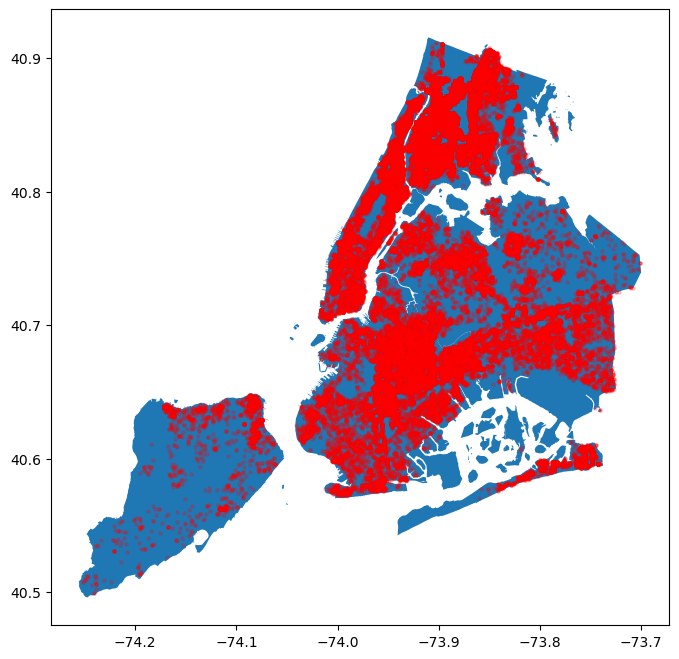

In [67]:
#plot the general graph for all boroughs
geo_df.plot(ax=boroughs.plot(figsize=(8, 8)), marker='o', color='red', markersize=5, alpha = 0.2);

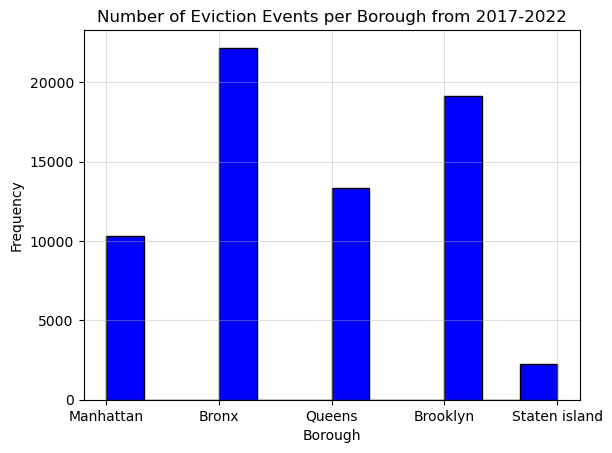

In [68]:
#bar graph of number evictions per borough from year 2019-2020
plt.pyplot.hist(x = geo_df['Borough'], bins = 12, color = "blue", edgecolor = 'black')
plt.pyplot.title("Number of Eviction Events per Borough from 2017-2022")
plt.pyplot.xlabel("Borough")
plt.pyplot.ylabel("Frequency")
plt.pyplot.grid(alpha= 0.4)
plt.pyplot.show()

In [69]:
#Which borough has the highest % of evictions

print("Manhattan composes", sum(evictions_drop['Borough']  == 'Manhattan')/len(evictions_drop['Racial Majority'])*100, "of total evictions") 
print("Bronx composes",sum(evictions_drop['Borough']  == 'Bronx')/len(evictions_drop['Racial Majority'])*100, "of total evictions")
print("Queens composes",sum(evictions_drop['Borough']  == 'Queens')/len(evictions_drop['Racial Majority'])*100, "of total evictions")
print("Brooklyn composes",sum(evictions_drop['Borough']  == 'Brooklyn')/len(evictions_drop['Racial Majority'])*100, "of total evictions")
print("Staten Island composes",sum(evictions_drop['Borough']  == 'Staten island')/len(evictions_drop['Racial Majority'])*100, "of total evictions")

Manhattan composes 15.329542748273397 of total evictions
Bronx composes 33.02125506072874 of total evictions
Queens composes 19.827637532745893 of total evictions
Brooklyn composes 28.465110740652538 of total evictions
Staten Island composes 3.3564539175994286 of total evictions


##### Visualizing evictions across one borough

The missing Lat Long data comes from Staten Island.

Let's look at the evictions in the Bronx

In [70]:
#Choose a borough
select_borough = 'Bronx'

In [71]:
#if you want a specific borough then you need the shape of the borough only
geo_borough = boroughs[boroughs['BoroName'] == select_borough]
geo_borough

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [72]:
#borough-specific dataframe
evicted_filted_by_borough = geo_df[geo_df['Borough'] == select_borough]

<AxesSubplot: >

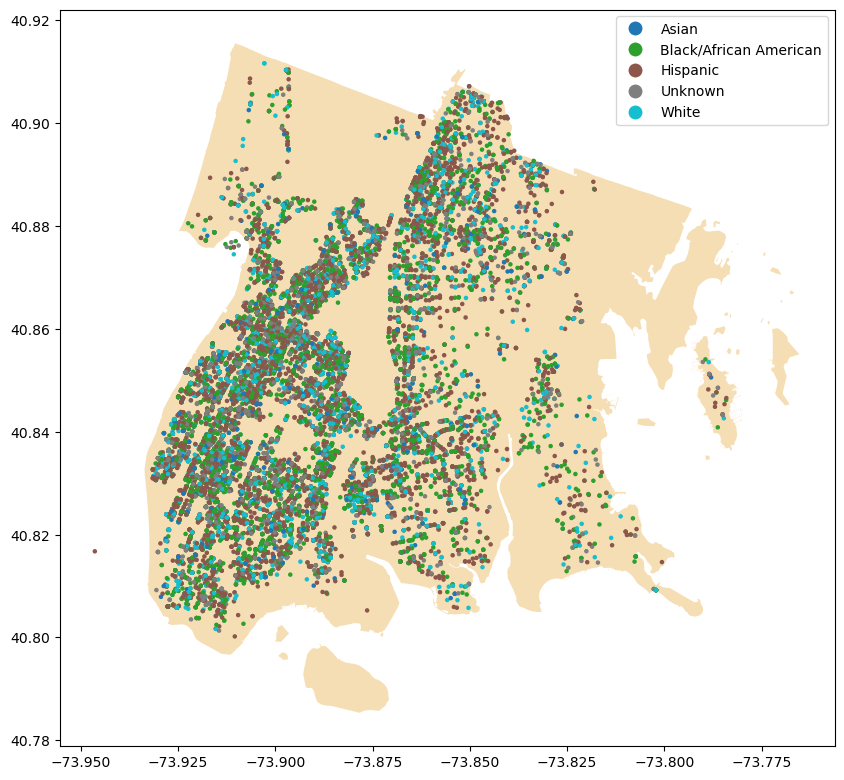

In [73]:
#plot the map for the selected borough with points labelling the racial majority in the neighborhood.
evicted_filted_by_borough.plot(ax=geo_borough.plot(figsize=(10, 10), color = 'wheat'), 
                               column = 'Racial Majority', categorical = True, legend = True,
                               marker='o', markersize=5, alpha = 1)

#it can also be geo_borough.boundary.plot

Now let's look at the evictions in Brooklyn.

### Part IV: Data Visualization

In [74]:
#Select Brooklyn
select_borough = 'Brooklyn'

In [75]:
#if you want a specific borough then you need the shape of the borough only
geo_borough = boroughs[boroughs['BoroName'] == select_borough]
geo_borough

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."


In [76]:
#borough-specific dataframe
evicted_filted_by_borough = geo_df[geo_df['Borough'] == select_borough]

<AxesSubplot: >

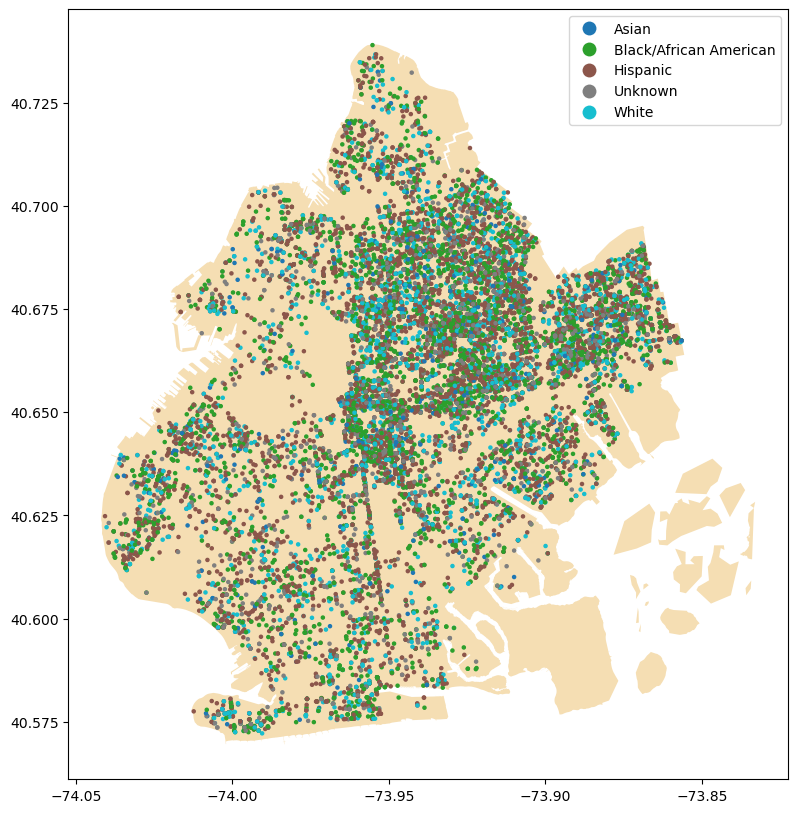

In [77]:
#plot the map for the selected borough with points labelling the racial majority in the neighborhood.
evicted_filted_by_borough.plot(ax=geo_borough.plot(figsize=(10, 10), color = 'wheat'), 
                               column = 'Racial Majority', categorical = True, legend = True,
                               marker='o', markersize=5, alpha = 1)

#it can also be geo_borough.boundary.plot

##### Evictions frequency based on neighborhood racial composition

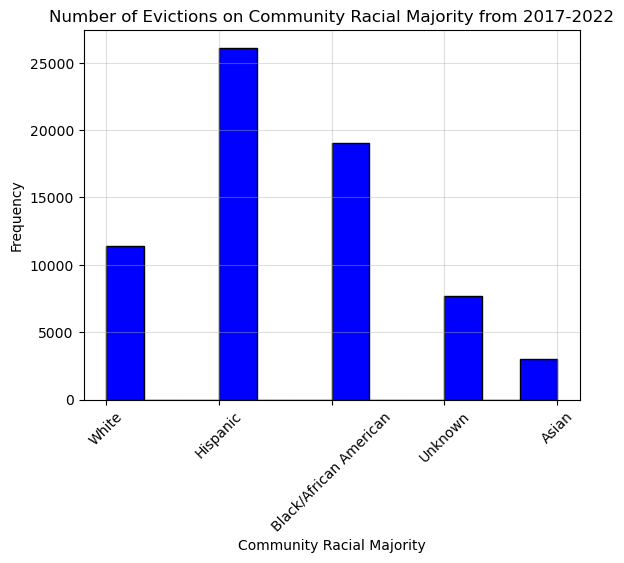

In [78]:
#bar graph of an eviction happening per race from 2017 - 2022
plt.pyplot.hist(x = evictions_drop['Racial Majority'], bins = 12, color = "blue", edgecolor = 'black')
plt.pyplot.title("Number of Evictions on Community Racial Majority from 2017-2022")
plt.pyplot.xlabel("Community Racial Majority")
plt.pyplot.ylabel("Frequency") 
plt.pyplot.xticks(rotation = 45)
plt.pyplot.grid(alpha = 0.4)
plt.pyplot.show()

In [79]:
print("White neighborhoods compose:", sum(evictions_drop['Racial Majority']  == 'White')/len(evictions_drop['Racial Majority'])*100, "of all evictions") 
print("Hispanic neighborhoods compose:", sum(evictions_drop['Racial Majority']  == 'Hispanic')/len(evictions_drop['Racial Majority'])*100, "of all evictions")
print("Black/African American neighborhoods compose:", sum(evictions_drop['Racial Majority']  == 'Black/African American')/len(evictions_drop['Racial Majority'])*100, "of all evictions")
print("Unkown race group neighborhoods compose:", sum(evictions_drop['Racial Majority']  == 'Unknown')/len(evictions_drop['Racial Majority'])*100, "of all evictions")
print("Asian neighborhoods compose:", sum(evictions_drop['Racial Majority']  == 'Asian')/len(evictions_drop['Racial Majority'])*100, "of all evictions")

White neighborhoods compose: 16.938556799237915 of all evictions
Hispanic neighborhoods compose: 38.87830435818052 of all evictions
Black/African American neighborhoods compose: 28.316265777566084 of all evictions
Unkown race group neighborhoods compose: 11.431293165039296 of all evictions
Asian neighborhoods compose: 4.435579899976185 of all evictions


From the previous cells. We can see that most of the evictions happening between 2017-2022 were in the Bronx and Brooklyn.

##### Finding count on Bronx and Brooklyn neighborhoods

We would like to find which neighborhoods within Bronx and Brooklyn had the most evictions.

In [80]:
#which neighborhoods in the Bronx had the most evictions
zip_borough_BX = geo_df[geo_df['Borough'] == 'Bronx']

zip_borough_BX.dropna().NTA.value_counts().head(6)

East Concourse-Concourse Village     1213
Bedford Park-Fordham North           1175
Williamsbridge-Olinville             1100
University Heights-Morris Heights    1065
Mount Hope                           1006
Morrisania-Melrose                    928
Name: NTA, dtype: int64

In [81]:
#which neighborhoods in Brooklyn had the most evictions
zip_borough_BR = geo_df[geo_df['Borough'] == 'Brooklyn']

zip_borough_BR.dropna().NTA.value_counts().head(6)

Crown Heights North                  1216
East New York                        1140
Flatbush                              887
Brownsville                           760
Prospect Lefferts Gardens-Wingate     741
Rugby-Remsen Village                  704
Name: NTA, dtype: int64

In [82]:
#number of evictions in each borough
evictions_drop.dropna().Borough.value_counts()

Bronx            20463
Brooklyn         15132
Manhattan         8854
Queens            7789
Staten island     1116
Name: Borough, dtype: int64

Within Brooklyn, the neighborhoods with the most evictions were Crown Heights North, East New York, and Flatbush. In the Bronx, the most evictions were in East Concourse, Bedford Park, and Williamsbridge.